# MNIST with Artificial Neural Network (ANN)

## Kütüphaneler

In [100]:
# Klasik kütüphaneler.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# TensorFlow
import tensorflow as tf

In [101]:
#MNIST veri setini Keras kütüphanesinden yüklüyoruz.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [102]:
# train ve test setleri X ve y olarak tek bir değişkende toplayalım.
X = np.concatenate([(X_train.reshape((X_train.shape[0], 28 * 28)).astype('float64')), (X_test.reshape((X_test.shape[0], 28 * 28)).astype('float64'))])

y = np.concatenate([y_train, y_test])

In [103]:
# X ve y setlerindeki toplam gözlem sayısını görüntüleyelim.
print(f'X setinde toplam {len(X)} gözlem var.')
print(f'y setinde toplam {len(y)} gözlem var.\n')

# Train ve test setlerin boyutlarını görüntüleyelim.
print(f'X_train setinin boyutu: {X_train.shape}')
print(f'X_test setinin boyutu: {X_test.shape}\n')

print(f'y_train setinin boyutu: {y_train.shape}')
print(f'y_test setinin boyutu: {y_test.shape}')

X setinde toplam 70000 gözlem var.
y setinde toplam 70000 gözlem var.

X_train setinin boyutu: (60000, 28, 28)
X_test setinin boyutu: (10000, 28, 28)

y_train setinin boyutu: (60000,)
y_test setinin boyutu: (10000,)


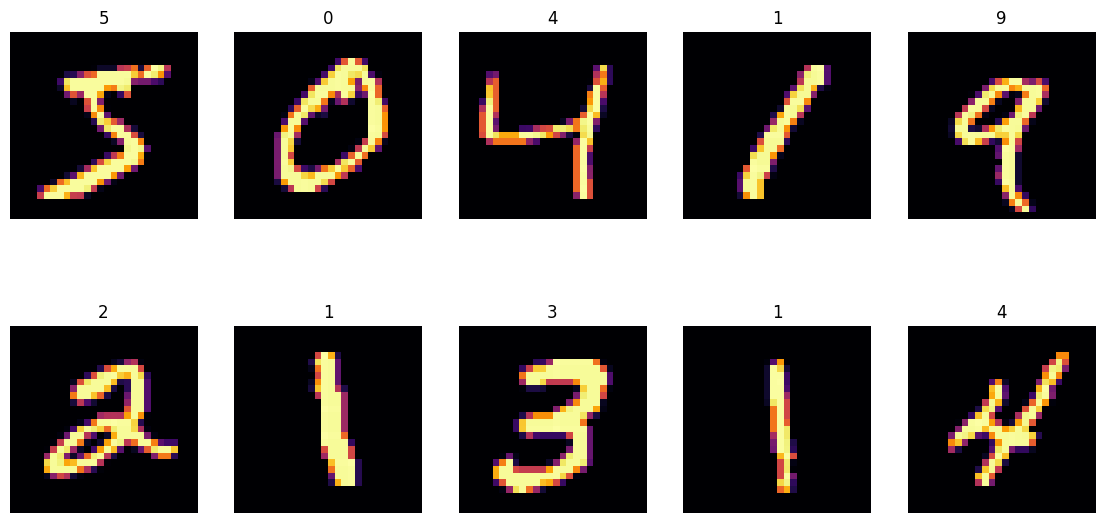

In [104]:
# İlk 10 gözlemi görüntüleyelim.
plt.figure(figsize = (14, 7))

for i in range(10):
  plt.subplot(2, 5, i + 1)
  plt.imshow(X_train[i], 'inferno')
  plt.title(y_train[i])
  plt.axis('off')

In [105]:
from matplotlib import colormaps
list(colormaps)[:5]

['magma', 'inferno', 'plasma', 'viridis', 'cividis']

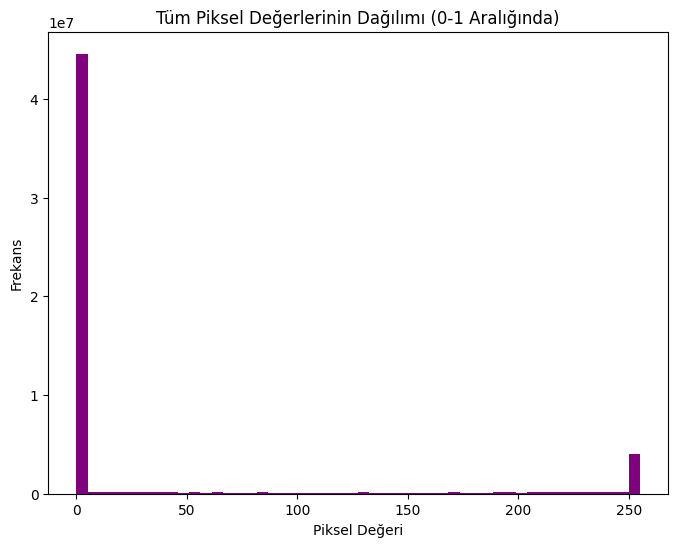

In [106]:
# Görsellerdeki piksel yoğunluğunu inceleyelim.
plt.figure(figsize=(8, 6))
plt.hist(X.flatten(), bins=50, color='purple')
plt.title('Tüm Piksel Değerlerinin Dağılımı (0-1 Aralığında)')
plt.xlabel('Piksel Değeri')
plt.ylabel('Frekans')
plt.show()

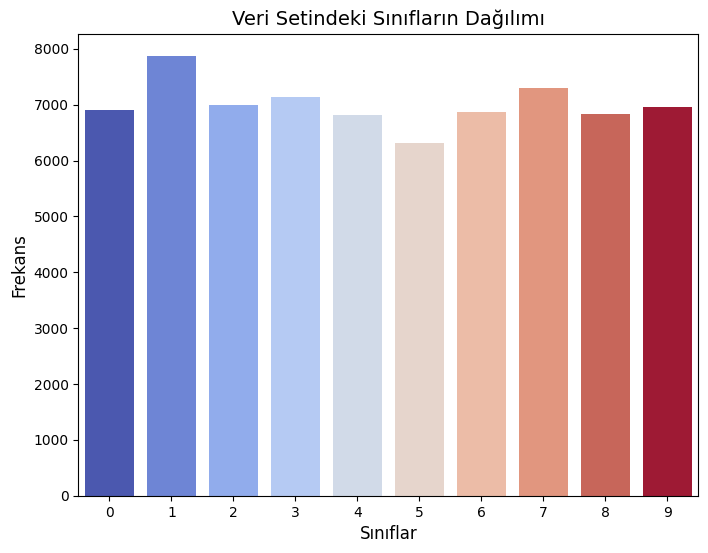

In [107]:
# Tüm veri setindeki sınıf dağılımını görüntüleyelim.

plt.figure(figsize = (8, 6))

sns.countplot(x = y, palette = 'coolwarm', hue = y, legend = False)

plt.title('Veri Setindeki Sınıfların Dağılımı', fontsize = 14)
plt.xlabel('Sınıflar', fontsize = 12)
plt.ylabel('Frekans', fontsize = 12)
plt.show()

In [108]:
# 28x28 boyutlarında olan görselleri flatten (düzleştirilmiş) hale getirmemiz gerekiyor.
# Arkasından her bir pikseli normalize edebilmek için 255'e bölüyoruz (gray-scale).

X_train = X_train.reshape((X_train.shape[0], 28 * 28)).astype('float64') / 255
X_test = X_test.reshape((X_test.shape[0], 28 * 28)).astype('float64') / 255

# Düzleştirilmiş setlerin boyutlarına tekrar bakalım.
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (60000, 784)
X_test shape: (10000, 784)


In [109]:
# Train setini train ve validation olarak ayıralım.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [110]:
# Train setinin ilk 5 gözlemini görüntüleyelim. Gördüğümüz üzere sınıf değerleri uint8 veri tipinde.
# Sınıflandırma yapabilmek için bu değerleri encode ederek kategorik hale çevireceğiz.
y_train[:5]

array([5, 0, 1, 6, 1], dtype=uint8)

In [111]:
# Encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_val = tf.keras.utils.to_categorical(y_val)
y_test = tf.keras.utils.to_categorical(y_test)

In [112]:
# Encode edilmiş değerleri görüntüleyelim.
y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [113]:
# ANN için Sequential modeli başlatalım.
model = tf.keras.models.Sequential()

# Model katmanlarını ekleyelim.
# Input Layer
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28 * 28,)))

# Hidden Layers
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))

# Output layer. Multi-class sınıflandırma için softmax kullanıyoruz.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [114]:
# Modeli compile edelim.
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [115]:
# Modeli fit ederek results değişkeninde saklayalım.
results = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val))


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 16s 33ms/step - accuracy: 0.8554 - loss: 0.4895 - val_accuracy: 0.9607 - val_loss: 0.1305
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9706 - loss: 0.0991 - val_accuracy: 0.9678 - val_loss: 0.1029
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9809 - loss: 0.0589 - val_accuracy: 0.9755 - val_loss: 0.0815
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9874 - loss: 0.0386 - val_accuracy: 0.9783 - val_loss: 0.0800
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9909 - loss: 0.0273 - val_accuracy: 0.9785 - val_loss: 0.0813
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9914 - loss: 0.0258 - val_accuracy: 0.9767 - val_loss: 0.0903
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9933 - loss: 0.0206 - val_accuracy: 0.9789 - val_loss: 0.0827
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9950 - loss: 0.0159 - val_a

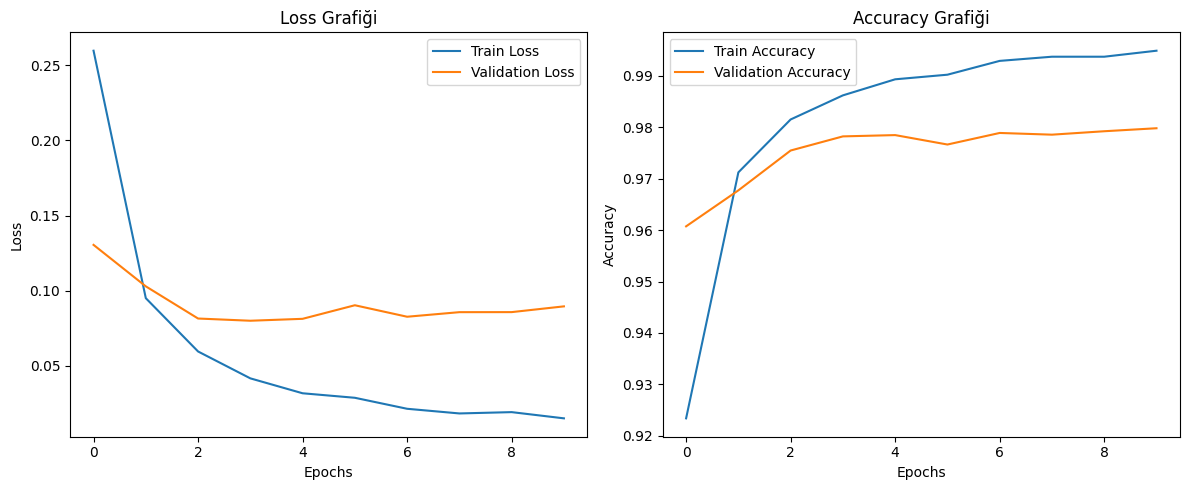

In [116]:
# Şimdi train ve validation setlerinin performanslarını karşılaştıralım.

# Figürü oluşturuyoruz.
plt.figure(figsize=(12, 5))

# Loss değeri için grafikleri çizdirelim.
plt.subplot(1, 2, 1)
plt.plot(results.history['loss'], label='Train Loss')
plt.plot(results.history['val_loss'], label='Validation Loss')
plt.title('Loss Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy score grafikleri çizdirelim.
plt.subplot(1, 2, 2)
plt.plot(results.history['accuracy'], label='Train Accuracy')
plt.plot(results.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Grafiği')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [117]:
# Şimdi test seti ile tahmin işlemini gerçekleştirip skora bakalım.
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) #argmax ile en yüksek olasılıklıklı sınıf değerini alıyoruz.

# Test için loss ve accuracy değerlerini alalım.
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss:', test_loss)
print('Accuracy Score:', test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Test Loss: 0.08902589976787567
Accuracy Score: 0.9781000018119812


In [119]:
# İlk tahmin değerinin olasılıklarını görüntüleyelim.
y_pred[0]

array([6.4533434e-11, 2.9374112e-08, 4.7365406e-10, 1.6267030e-07,
       6.6833081e-08, 4.0416202e-11, 2.9187948e-13, 9.9999136e-01,
       3.9985893e-11, 8.3323503e-06], dtype=float32)

In [125]:
np.set_printoptions(suppress = True)

print(y_pred[0])

[0.         0.00000003 0.         0.00000016 0.00000007 0.
 0.         0.99999136 0.         0.00000833]


In [128]:
# İlk değerin gerçek değerini görüntüleyelim.
print(y_test[0])

print(np.argmax(y_test[0]))

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7


In [129]:
# İlk 10 tahmin değerini görüntüleyelim.
y_pred_classes[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

<BarContainer object of 10 artists>

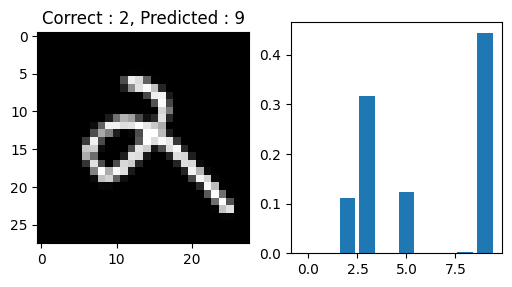

In [143]:
k = 2
ix = (np.argmax(y_test, axis =  1) != y_pred_classes)

plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plt.imshow(X_test[ix][k].reshape(28,28), "gray")
plt.title(f"Correct : {np.argmax(y_test, axis =  1)[ix][k]}, Predicted : {y_pred_classes[ix][k]}")

plt.subplot(1,2,2)
plt.bar(np.arange(10), y_pred[ix][k])
